In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster  import KMeans
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
%matplotlib inline

In [3]:
# input_df = pd.read_csv('./data/delivery_fleet_driver_data.csv', header=0,
#                       delimiter='\t')
digits = load_digits()
digits.data.shape

(1797, 64)

In [4]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

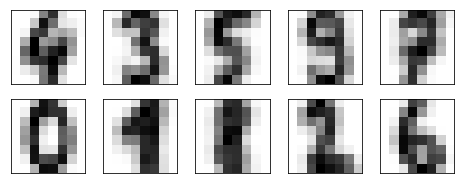

In [6]:
fig, ax = plt.subplots(2,5, figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [9]:
from scipy.stats  import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

Text(91.68,0.5,'predicted label')

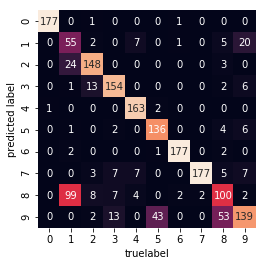

In [17]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=digits.target_names,
           yticklabels=digits.target_names)
plt.xlabel('truelabel')
plt.ylabel('predicted label')